In [1]:
import tensorflow as tf
print(tf.__version__)

2.8.2


# Data Pipeline

 ## Coding tutorials
 #### [1. Keras datasets](#coding_tutorial_1)
 #### [2. Dataset generators](#coding_tutorial_2)
 #### [3. Keras image data augmentation](#coding_tutorial_3)
 #### [4. The Dataset class](#coding_tutorial_4)
 #### [5. Training with Datasets](#coding_tutorial_5)

***
<a id="coding_tutorial_1"></a>
## Keras datasets

For a list of Keras datasets and documentation on recommended usage, see [this link](https://keras.io/datasets/).

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#### Load the CIFAR-100 Dataset

In [3]:
from tensorflow.keras.datasets import cifar100

In [4]:
# Load the CIFAR-100 dataset

(train_images, train_labels), (test_images, test_labels) = cifar100.load_data(label_mode = 'fine')

169017344/169001437 [==============================] - 3s 0us/step


In [8]:
# Confirm that reloading the dataset does not require a download

(train_images, train_labels), (test_images, test_labels) = cifar100.load_data(label_mode = 'fine')

#### Examine the Dataset

#### Import the Data

The additional files required for this tutorial can be downloaded from the following link:

cifar100_fine_labels: https://drive.google.com/open?id=1WFW1cj8v_5z1pGvq6htQyFUPrJP-Z2v5

cifar100_coarse_labels: https://drive.google.com/open?id=1Jmt7o-6sP85D7iRORk5tJqJMN3wCP12p

You should store these files in Drive for use in this Colab notebook.

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# Run this cell to connect to your Drive folder

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [10]:
# Examine the shape of the data.

print('\nTrain images shape: ', train_images.shape)
print('Train labels shape: ', train_labels.shape)
print('\nTest images shape: ', test_images.shape)
print('Test labels shape: ', test_labels.shape)


Train images shape:  (50000, 32, 32, 3)
Train labels shape:  (50000, 1)

Test images shape:  (10000, 32, 32, 3)
Test labels shape:  (10000, 1)



Label of 300th images:  [60]


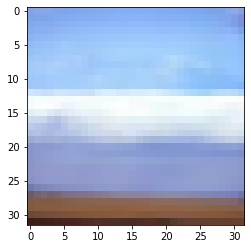

In [13]:
# Examine one of the images and its corresponding label

print('\nLabel of 300th images: ', train_labels[300])
plt.imshow(train_images[300])

In [17]:
# Load the list of labels from a JSON file
# Please use your own path once you have downloaded the .json file and mounted your Drive

import json

with open('drive/MyDrive/Colab Notebooks/cifar100_fine_labels.json', 'r') as fine_labels:
    cifar100_fine_labels = json.load(fine_labels)

The list of labels for the CIFAR-100 dataset are available [here](https://www.cs.toronto.edu/~kriz/cifar.html).

In [18]:
# Print a few of the labels

cifar100_fine_labels[0:5]

['apple', 'aquarium_fish', 'baby', 'bear', 'beaver']

In [22]:
# Print the corresponding label for the example above

print('Name of selected image whose label is [60]: ', cifar100_fine_labels[60])

Name of selected image whose label is [60]:  plain


#### Load the data using different label modes

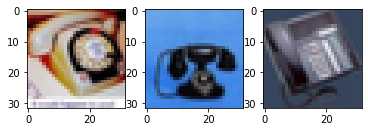

In [23]:
# Display a few examples from category 87 (index 86) and the list of labels

examples = train_images[(train_labels.T == 86)[0]][:3]
fig, ax = plt.subplots(1,3)
ax[0].imshow(examples[0])
ax[1].imshow(examples[1])
ax[2].imshow(examples[2])

In [24]:
# Reload the data using the 'coarse' label mode

(train_images, train_labels), (test_images, test_labels) = cifar100.load_data(label_mode = 'coarse')

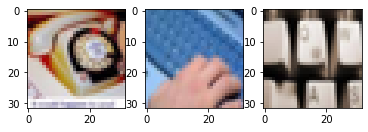

In [25]:
# Display three images from the dataset with the label 6 (index 5)

examples = train_images[(train_labels.T == 5)[0]][:3]
fig, ax = plt.subplots(1,3)
ax[0].imshow(examples[0])
ax[1].imshow(examples[1])
ax[2].imshow(examples[2])

In [26]:
# Load the list of coarse labels from a JSON file
# Please use your own path once you have downloaded the .json file
with open('drive/MyDrive/Colab Notebooks/cifar100_coarse_labels.json', 'r') as coarse_labels:
    cifar100_coarse_labels = json.load(coarse_labels)

In [27]:
# Print a few of the labels

cifar100_coarse_labels[0:5]

['aquatic mammals',
 'fish',
 'flowers',
 'food containers',
 'fruit and vegetables']

In [29]:
# Print the corresponding label for the example above

print('Corresponding label within fine labeling: ', cifar100_fine_labels[86])
print('Corresponding label within coarse labeling: ', cifar100_coarse_labels[5])

Corresponding label within fine labeling:  telephone
Corresponding label within coarse labeling:  household electrical device


#### Load the IMDB Dataset

In [30]:
from tensorflow.keras.datasets import imdb

In [31]:
# Load the IMDB dataset

(train_data, train_labels), (test_data, test_labels) = imdb.load_data() 

17473536/17464789 [==============================] - 0s 0us/step


In [33]:
# Print an example from the training dataset, along with its corresponding label
print('\nSample training label: ', train_labels[10])
print('Sample training data: ', train_data[10], '\n')


Sample training label:  1
Sample training data:  [1, 785, 189, 438, 47, 110, 142, 7, 6, 7475, 120, 4, 236, 378, 7, 153, 19, 87, 108, 141, 17, 1004, 5, 30432, 883, 10789, 23, 8, 4, 136, 13772, 11631, 4, 7475, 43, 1076, 21, 1407, 419, 5, 5202, 120, 91, 682, 189, 2818, 5, 9, 1348, 31, 7, 4, 118, 785, 189, 108, 126, 93, 13772, 16, 540, 324, 23, 6, 364, 352, 21, 14, 9, 93, 56, 18, 11, 230, 53, 771, 74, 31, 34, 4, 2834, 7, 4, 22, 5, 14, 11, 471, 9, 17547, 34, 4, 321, 487, 5, 116, 15, 6584, 4, 22, 9, 6, 2286, 4, 114, 2679, 23, 107, 293, 1008, 1172, 5, 328, 1236, 4, 1375, 109, 9, 6, 132, 773, 14799, 1412, 8, 1172, 18, 7865, 29, 9, 276, 11, 6, 2768, 19, 289, 409, 4, 5341, 2140, 20250, 648, 1430, 10136, 8914, 5, 27, 3000, 1432, 7130, 103, 6, 346, 137, 11, 4, 2768, 295, 36, 7740, 725, 6, 3208, 273, 11, 4, 1513, 15, 1367, 35, 154, 14040, 103, 19100, 173, 7, 12, 36, 515, 3547, 94, 2547, 1722, 5, 3547, 36, 203, 30, 502, 8, 361, 12, 8, 989, 143, 4, 1172, 3404, 10, 10, 328, 1236, 9, 6, 55, 221, 2989,

In [34]:
# Get the lengths of the input sequences

sequence_lengths = [len(seq) for seq in train_data]

In [37]:
# Determine the maximum and minimum sequence length

print('\nMaximum sequence length: ', np.max(sequence_lengths))
print('Minimum sequence length: ', np.min(sequence_lengths), '\n')



Maximum sequence length:  2494
Minimum sequence length:  11 



#### Using Keyword Arguments

In [38]:
# Load the data ignoring the 50 most frequent words, use oov_char=2 (this is the default)

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(skip_top = 50, oov_char = 2)

In [39]:
# Get the lengths of the input sequences

sequence_lengths = [len(seq) for seq in train_data]

In [40]:
# Determine the maximum and minimum sequence length

print('\nMaximum sequence length: ', np.max(sequence_lengths))
print('Minimum sequence length: ', np.min(sequence_lengths), '\n')



Maximum sequence length:  2494
Minimum sequence length:  11 



In [41]:
# Define functions for filtering the sequences

def remove_oov_char(element):
    ''' Filter function for removing the oov_char. '''
    return [word for word in element if word!=2]

def filter_list(lst):
    ''' Run remove_oov_char on elements in a list. '''
    return [remove_oov_char(element) for element in lst]

In [42]:
# Remove the oov_char from the sequences using the filter_list function

train_data = filter_list(train_data)

In [43]:
# Get the lengths of the input sequences

sequence_lengths = [len(seq) for seq in train_data]

In [44]:
# Determine the maximum and minimum sequence length

print('\nMaximum sequence length: ', np.max(sequence_lengths))
print('Minimum sequence length: ', np.min(sequence_lengths), '\n')


Maximum sequence length:  1648
Minimum sequence length:  3 



***
<a id="coding_tutorial_2"></a>
## Dataset generators

In [45]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Load the UCI Fertility Dataset

We will be using a dataset available at https://archive.ics.uci.edu/ml/datasets/Fertility from UC Irvine.

#### Import the data

The dataset required for this tutorial can be downloaded from the following link:

https://drive.google.com/open?id=1OA0lwa5YLDs1njS377jbqPpMSlH5TzQV

You should store this file in Drive for use in this Colab notebook.

In [46]:
# Run this cell to connect to your Drive folder

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [49]:
# Load the fertility dataset
# Please use your own path once you have downloaded the dataset and mounted your Drive

headers = ['Season', 'Age', 'Diseases', 'Trauma', 'Surgery', 'Fever', 'Alcohol', 'Smoking', 'Sitting', 'Output']
fertility = pd.read_csv('gdrive/MyDrive/Colab Notebooks/fertility_Diagnosis.txt', delimiter=',', header=None, names=headers)

In [50]:
# Print the shape of the DataFrame

print(fertility.shape)

(100, 10)


In [51]:
# Show the head of the DataFrame

fertility.head()

,Season,Age,Diseases,Trauma,Surgery,Fever,Alcohol,Smoking,Sitting,Output
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,N
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,O
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,N
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,N
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,O


#### Process the data

In [52]:
# Map the 'Output' feature from 'N' to 0 and from 'O' to 1

fertility['Output'] = fertility['Output'].map(lambda x : 0.0 if x=='N' else 1.0)

In [53]:
# Show the head of the DataFrame

fertility.head()

,Season,Age,Diseases,Trauma,Surgery,Fever,Alcohol,Smoking,Sitting,Output
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,0.0
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,1.0
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,0.0
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,0.0
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,1.0


In [54]:
# Convert the DataFrame so that the features are mapped to floats

fertility = fertility.astype('float32')

In [55]:
# Shuffle the DataFrame

fertility = fertility.sample(frac=1).reset_index(drop=True)

In [56]:
# Show the head of the DataFrame

fertility.head()

,Season,Age,Diseases,Trauma,Surgery,Fever,Alcohol,Smoking,Sitting,Output
0,-1.00,0.67,0.0,0.0,1.0,0.0,0.6,0.0,0.50,1.0
1,-1.00,0.53,1.0,1.0,0.0,1.0,1.0,0.0,0.31,0.0
2,1.00,0.78,1.0,1.0,1.0,0.0,0.6,0.0,0.13,0.0
3,-0.33,0.69,1.0,1.0,1.0,-1.0,1.0,-1.0,0.75,0.0
4,-0.33,0.75,1.0,1.0,1.0,0.0,0.6,-1.0,0.19,0.0


In [57]:
# Convert the field Season to a one-hot encoded vector

fertility = pd.get_dummies(fertility, prefix='Season', columns=['Season'])

In [58]:
# Show the head of the DataFrame

fertility.head()

,Age,Diseases,Trauma,Surgery,Fever,Alcohol,Smoking,Sitting,Output,Season_-1.0,Season_-0.33000001311302185,Season_0.33000001311302185,Season_1.0
0,0.67,0.0,0.0,1.0,0.0,0.6,0.0,0.50,1.0,1,0,0,0
1,0.53,1.0,1.0,0.0,1.0,1.0,0.0,0.31,0.0,1,0,0,0
2,0.78,1.0,1.0,1.0,0.0,0.6,0.0,0.13,0.0,0,0,0,1
3,0.69,1.0,1.0,1.0,-1.0,1.0,-1.0,0.75,0.0,0,1,0,0
4,0.75,1.0,1.0,1.0,0.0,0.6,-1.0,0.19,0.0,0,1,0,0


*N.B. The below cell has been updated since the coding tutorial.*

In [59]:
# Move the Output column such that it is the last column in the DataFrame

fertility = fertility.reindex(columns = [col for col in fertility.columns if col != 'Output'] + ['Output'])

In [60]:
# Show the head of the DataFrame

fertility.head()

,Age,Diseases,Trauma,Surgery,Fever,Alcohol,Smoking,Sitting,Season_-1.0,Season_-0.33000001311302185,Season_0.33000001311302185,Season_1.0,Output
0,0.67,0.0,0.0,1.0,0.0,0.6,0.0,0.50,1,0,0,0,1.0
1,0.53,1.0,1.0,0.0,1.0,1.0,0.0,0.31,1,0,0,0,0.0
2,0.78,1.0,1.0,1.0,0.0,0.6,0.0,0.13,0,0,0,1,0.0
3,0.69,1.0,1.0,1.0,-1.0,1.0,-1.0,0.75,0,1,0,0,0.0
4,0.75,1.0,1.0,1.0,0.0,0.6,-1.0,0.19,0,1,0,0,0.0


In [61]:
# Convert the DataFrame to a numpy array.

fertility = fertility.to_numpy()

#### Split the Data

In [62]:
# Split the dataset into training and validation set

training = fertility[0:70]
validation = fertility[70:100]

In [63]:
# Verify the shape of the training data

print('\nTraining set shape: ', training.shape)
print('\nValidation set shape: ', validation.shape)


Training set shape:  (70, 13)

Validation set shape:  (30, 13)


In [64]:
# Separate the features and labels for the validation and training data

training_features = training[:,0:-1]
training_labels = training[:,-1]
validation_features = validation[:,0:-1]
validation_labels = validation[:,-1]

#### Create the Generator

In [65]:
# Create a function that returns a generator producing inputs and labels

def get_generator(features, labels, batch_size=1):
    for n in range(int(len(features)/batch_size)):
        yield (features[n*batch_size: (n+1)*batch_size], labels[n*batch_size: (n+1)*batch_size])

In [66]:
# Apply the function to our training features and labels with a batch size of 10

train_generator = get_generator(training_features, training_labels, batch_size=10)

In [67]:
# Test the generator using the next() function

next(train_generator)

(array([[ 0.67,  0.  ,  0.  ,  1.  ,  0.  ,  0.6 ,  0.  ,  0.5 ,  1.  ,
          0.  ,  0.  ,  0.  ],
        [ 0.53,  1.  ,  1.  ,  0.  ,  1.  ,  1.  ,  0.  ,  0.31,  1.  ,
          0.  ,  0.  ,  0.  ],
        [ 0.78,  1.  ,  1.  ,  1.  ,  0.  ,  0.6 ,  0.  ,  0.13,  0.  ,
          0.  ,  0.  ,  1.  ],
        [ 0.69,  1.  ,  1.  ,  1.  , -1.  ,  1.  , -1.  ,  0.75,  0.  ,
          1.  ,  0.  ,  0.  ],
        [ 0.75,  1.  ,  1.  ,  1.  ,  0.  ,  0.6 , -1.  ,  0.19,  0.  ,
          1.  ,  0.  ,  0.  ],
        [ 0.5 ,  1.  ,  1.  ,  0.  , -1.  ,  0.8 ,  0.  ,  0.88,  0.  ,
          1.  ,  0.  ,  0.  ],
        [ 0.75,  1.  ,  0.  ,  0.  ,  0.  ,  0.6 ,  0.  ,  0.25,  0.  ,
          0.  ,  0.  ,  1.  ],
        [ 0.58,  1.  ,  0.  ,  0.  ,  0.  ,  0.6 ,  1.  ,  0.5 ,  0.  ,
          0.  ,  0.  ,  1.  ],
        [ 0.56,  1.  ,  1.  ,  0.  ,  0.  ,  0.4 ,  1.  ,  0.63,  0.  ,
          1.  ,  0.  ,  0.  ],
        [ 0.61,  1.  ,  0.  ,  1.  ,  0.  ,  1.  , -1.  ,  0.63,  0.  ,
 

#### Build the model

In [68]:
# Create a model using Keras with 3 layers

from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Input, BatchNormalization

input_shape = (12,)
output_shape = (1,)

model_input = Input(input_shape)
batch_1 = BatchNormalization(momentum=0.8)(model_input)
dense_1 = Dense(100, activation='relu')(batch_1)
batch_2 = BatchNormalization(momentum=0.8)(dense_1)
output = Dense(1, activation='sigmoid')(batch_2)

model = Model([model_input], output)

In [69]:
# Display the model summary to show the resultant structure

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 12)]              0         
                                                                 
 batch_normalization (BatchN  (None, 12)               48        
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 100)               1300      
                                                                 
 batch_normalization_1 (Batc  (None, 100)              400       
 hNormalization)                                                 
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 1,849
Trainable params: 1,625
Non-trainable par

#### Compile the model

In [70]:
# Create the optimizer object

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-2)

In [71]:
# Compile the model with loss function and metric

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

#### Train and evaluate the model using the generator

In [72]:
# Calculate the number of training steps per epoch for the given batch size.

batch_size = 5
train_steps = len(training) // batch_size

In [73]:
# Set the epochs to 3

epochs = 3

In [74]:
# Train the model

for epoch in range(epochs):
  train_generator = get_generator(training_features, training_labels,
                                   batch_size = batch_size)
  validation_generator = get_generator(validation_features, validation_labels,
                                   batch_size = 10)
  model.fit_generator(train_generator, steps_per_epoch = train_steps,
                      validation_data = validation_generator, validation_steps = 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  if __name__ == '__main__':


14/14 [==============================] - 0s 10ms/step - loss: 0.0955 - accuracy: 0.9714 - val_loss: 0.2271 - val_accuracy: 0.8000


In [75]:
# Try to run the fit_generator function once more; observe what happens

model.fit_generator(train_generator, steps_per_epoch=train_steps)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


StopIteration: ignored

#### Make an infinitely looping generator

In [76]:
# Create a function that returns an infinitely looping generator

def get_generator_cyclic(features, labels, batch_size=1):
    while True:
      for n in range(int(len(features)/batch_size)):
          yield (features[n*batch_size: (n+1)*batch_size], labels[n*batch_size: (n+1)*batch_size])
      permuted = np.random.permutation(len(features))
      features = features[permuted]
      labels = labels[permuted]

In [77]:
# Create a generator using this function.

train_generator_cyclic = get_generator_cyclic(training_features, training_labels, batch_size=batch_size)

In [78]:
# Assert that the new cyclic generator does not raise a StopIteration

for i in range(2*train_steps):
    next(train_generator_cyclic)

In [79]:
# Generate a cyclic validation generator

validation_generator_cyclic = get_generator_cyclic(validation_features, validation_labels, batch_size=batch_size)

In [80]:
# Train the model

model.fit_generator(train_generator_cyclic, steps_per_epoch = train_steps,
                    validation_data = validation_generator_cyclic, validation_steps = 1,
                    epochs = 3)

Epoch 1/3
13/14 [==========================>...] - ETA: 0s - loss: 0.1947 - accuracy: 0.9077

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


14/14 [==============================] - 0s 13ms/step - loss: 0.2512 - accuracy: 0.9000 - val_loss: 0.1065 - val_accuracy: 1.0000
Epoch 2/3
14/14 [==============================] - 0s 7ms/step - loss: 0.2481 - accuracy: 0.9000 - val_loss: 0.5103 - val_accuracy: 0.8000
Epoch 3/3
14/14 [==============================] - 0s 8ms/step - loss: 0.3012 - accuracy: 0.8714 - val_loss: 0.5325 - val_accuracy: 0.8000


#### Evaluate the model and get predictions

In [81]:
# Let's obtain a validation data generator.

validation_generator = get_generator(validation_features, validation_labels, batch_size=30)

In [82]:
# Get predictions on the validation data

predictions = model.predict_generator(validation_generator, steps = 1)
print(np.round(predictions.T[0]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0.
 0. 0. 0. 0. 0. 0.]


In [83]:
# Print the corresponding validation labels

print(validation_labels)

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 1.]


In [84]:
# Obtain a validation data generator

validation_generator = get_generator(validation_features, validation_labels, batch_size=30)

In [85]:
# Evaluate the model

print(model.evaluate(validation_generator))

1/1 [==============================] - 0s 98ms/step - loss: 0.6535 - accuracy: 0.7667
[0.653454601764679, 0.7666666507720947]


***
<a id="coding_tutorial_3"></a>
## Keras image data augmentation

#### Import the data

The dataset required for this tutorial can be downloaded from the following link:

https://drive.google.com/open?id=11Y43ta5gT672L3sfJFR2DvPs-ralY5Pd

You should store these files in Drive for use in this Colab notebook.

In [86]:
# Run this cell to connect to your Drive folder

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [87]:
import matplotlib.pyplot as plt
import numpy as np

#### Load the CIFAR-10 Dataset

In [88]:
from tensorflow.keras.datasets import cifar10

In [89]:
# Load the CIFAR-10 dataset

(training_features, training_labels), (test_features, test_labels) = cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [90]:
# Convert the labels to a one-hot encoding

num_classes = 10

training_labels = tf.keras.utils.to_categorical(training_labels, num_classes)
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes)

#### Create a generator function

In [91]:
# Create a function that returns a data generator

def get_generator(features, labels, batch_size=1):
    for n in range(int(len(features)/batch_size)):
        yield (features[n*batch_size:(n+1)*batch_size], labels[n*batch_size:(n+1)*batch_size])

In [92]:
# Use the function we created to get a training data generator with a batch size of 1

training_generator = get_generator(training_features, training_labels)

In [93]:
# Assess the shape of the items generated by training_generator using the `next` function to yield an item.

image, label = next(training_generator)
print(image.shape)
print(label.shape)

(1, 32, 32, 3)
(1, 10)


[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


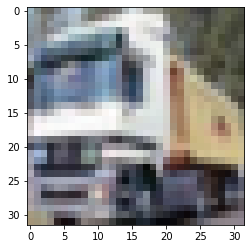

In [94]:
# Test the training generator by obtaining an image using the `next` generator function, and then using imshow to plot it.
# Print the corresponding label

from matplotlib.pyplot import imshow

image, label = next(training_generator)
image_unbatched = image[0,:,:,:]
imshow(image_unbatched)
print(label)

In [95]:
# Reset the generator by re-running the `get_generator` function.

train_generator = get_generator(training_features, training_labels)

#### Create a data augmentation generator

In [96]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [97]:
# Create a function to convert an image to monochrome

def monochrome(x):
    def func_bw(a):
        average_colour = np.mean(a)
        return [average_colour, average_colour, average_colour]
    x = np.apply_along_axis(func_bw, -1, x)
    return x

In [99]:
# Create an ImageDataGenerator object

image_generator = ImageDataGenerator(preprocessing_function = monochrome, 
                                     rotation_range = 10,
                                     rescale = (1/255.0))
image_generator.fit(training_features)

Check [the documentation](https://keras.io/preprocessing/image/) for the full list of image data augmentation options. 

In [100]:
# Create an iterable generator using the `flow` function

image_generator_iterable = image_generator.flow(training_features, training_labels,
                                                batch_size = 1, shuffle = False)

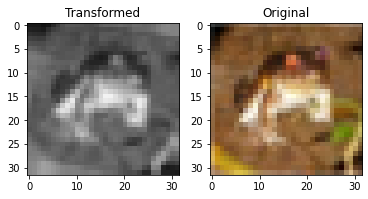

In [101]:
# Show a sample from the generator and compare with the original

image, label = next(image_generator_iterable)
image_orig, label_orig = next(train_generator)
figs, axes = plt.subplots(1,2)
axes[0].imshow(image[0,:,:,:])
axes[0].set_title('Transformed')
axes[1].imshow(image_orig[0,:,:,:])
axes[1].set_title('Original')
plt.show()

#### Flow from directory

In [109]:
! ls gdrive/MyDrive/ColabNotebooks/

 Autoregressive_PS.ipynb
 cifar100_coarse_labels.json
 cifar100_fine_labels.json
'Coding_Tutorial (1).ipynb'
'Coding Tutorial.ipynb'
 Coding_Tutorial.ipynb
 fertility_Diagnosis.txt
 flowers-recognition-split.zip
 gkecibas16_hw2.ipynb
 HW1_Autoregressive_Models.ipynb
 Keras.ipynb
 landmark.ipynb
 Practice_Keras_DL.ipynb
 pytorch-tutorial
 PyTorch_Tutorial.ipynb
 scripting_1.ipynb
 scripting_generate_message.ipynb
 scripting_raw_input.ipynb
 scritpiting_errors-excps.ipynb
'Simple custom layer example: Antirectifier.ipynb'
 single-perceptron.ipynb
 TF2_CC.ipynb
 Untitled0.ipynb
'Week 1 Programming Assignment.ipynb'


In [114]:
# Inspect the directory structure
# Please use your own path once you have downloaded the dataset and mounted your Drive

train_path = 'gdrive/MyDrive/ColabNotebooks/flowers-recognition-split/train'
val_path = 'gdrive/MyDrive/ColabNotebooks/flowers-recognition-split/val'

In [115]:
# Create an ImageDataGenerator object

datagenerator = ImageDataGenerator(rescale=(1/255.0))

In [116]:
classes = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [117]:
# Create a training data generator

train_generator = datagenerator.flow_from_directory(train_path, batch_size = 64,
                                                    classes = classes, target_size = (16, 16))

Found 3027 images belonging to 5 classes.


In [118]:
# Create a validation data generator

val_generator = datagenerator.flow_from_directory(val_path, batch_size = 64, 
                                                  classes = classes, target_size = (16, 16))

Found 1296 images belonging to 5 classes.


[0. 0. 0. 0. 1.]


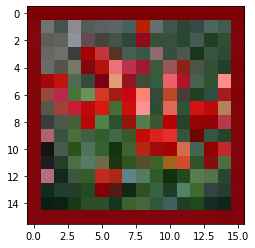

In [119]:
# Get and display an image and label from the training generator

x = next(train_generator)
imshow(x[0][4])
print(x[1][4])

In [120]:
# Reset the training generator

train_generator = datagenerator.flow_from_directory(train_path, batch_size = 64,
                                                    classes = classes, target_size = (16, 16))

Found 3027 images belonging to 5 classes.


#### Create a model to train

In [121]:
# Build a CNN model

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Input, Flatten, Dense

model = tf.keras.Sequential()
model.add(Input((16,16,3)))
model.add(Conv2D(8, (8, 8), padding='same', activation='relu'))
model.add(MaxPooling2D((4,4)))
model.add(Conv2D(8, (8, 8), padding='same', activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(4, (4, 4), padding='same', activation='relu'))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(5, activation='softmax'))

In [122]:
# Create an optimizer object

optimizer = tf.keras.optimizers.Adam(1e-3)

In [123]:
# Compile the model

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [124]:
# Print the model summary

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 16, 16, 8)         1544      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 4, 4, 8)          0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 4, 4, 8)           4104      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 2, 2, 8)          0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 2, 2, 4)           516       
                                                                 
 flatten (Flatten)           (None, 16)                0

#### Train the model

In [125]:
# Calculate the training generator and test generator steps per epoch

train_steps_per_epoch = train_generator.n // train_generator.batch_size
val_steps = val_generator.n // val_generator.batch_size
print(train_steps_per_epoch, val_steps)

47 20


In [126]:
# Fit the model

model.fit_generator(train_generator, steps_per_epoch = train_steps_per_epoch,
                    epochs = 5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


Epoch 1/5
47/47 [==============================] - 517s 11s/step - loss: 1.5793 - accuracy: 0.2713
Epoch 2/5
47/47 [==============================] - 14s 305ms/step - loss: 1.4481 - accuracy: 0.3442
Epoch 3/5
47/47 [==============================] - 14s 307ms/step - loss: 1.3450 - accuracy: 0.4050
Epoch 4/5
47/47 [==============================] - 14s 307ms/step - loss: 1.2918 - accuracy: 0.4492
Epoch 5/5
47/47 [==============================] - 14s 306ms/step - loss: 1.2536 - accuracy: 0.4681


#### Evaluate the model

In [127]:
# Evaluate the model

model.evaluate_generator(val_generator, steps = val_steps)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


[1.281787633895874, 0.4312500059604645]

#### Predict using the generator

In [128]:
# Predict labels with the model

predictions = model.predict_generator(val_generator, steps = 1)
print(np.round(predictions, 2))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


[[0.41 0.4  0.07 0.03 0.09]
 [0.06 0.59 0.   0.32 0.02]
 [0.11 0.66 0.01 0.18 0.03]
 [0.2  0.48 0.04 0.19 0.09]
 [0.09 0.66 0.01 0.22 0.03]
 [0.05 0.04 0.49 0.01 0.41]
 [0.05 0.08 0.1  0.58 0.18]
 [0.06 0.11 0.08 0.58 0.17]
 [0.12 0.66 0.01 0.18 0.03]
 [0.07 0.68 0.   0.22 0.02]
 [0.09 0.21 0.04 0.57 0.1 ]
 [0.16 0.25 0.08 0.34 0.16]
 [0.08 0.03 0.59 0.   0.29]
 [0.27 0.68 0.01 0.02 0.03]
 [0.15 0.41 0.03 0.32 0.08]
 [0.02 0.02 0.47 0.02 0.47]
 [0.07 0.02 0.64 0.   0.27]
 [0.27 0.27 0.12 0.17 0.18]
 [0.1  0.35 0.02 0.46 0.07]
 [0.53 0.34 0.06 0.01 0.07]
 [0.12 0.13 0.16 0.36 0.23]
 [0.42 0.41 0.06 0.03 0.08]
 [0.09 0.35 0.02 0.49 0.06]
 [0.28 0.33 0.08 0.16 0.14]
 [0.4  0.5  0.03 0.02 0.05]
 [0.05 0.07 0.36 0.06 0.47]
 [0.14 0.55 0.02 0.24 0.05]
 [0.18 0.63 0.02 0.14 0.04]
 [0.31 0.46 0.04 0.1  0.08]
 [0.35 0.39 0.07 0.08 0.11]
 [0.01 0.01 0.62 0.01 0.35]
 [0.32 0.39 0.06 0.13 0.11]
 [0.07 0.14 0.05 0.63 0.11]
 [0.12 0.64 0.01 0.18 0.04]
 [0.48 0.27 0.11 0.03 0.12]
 [0.06 0.07 0.32 0.1

***
<a id="coding_tutorial_4"></a>
## The Dataset Class

#### Import the data

The dataset required for this tutorial can be downloaded from the following link:

https://drive.google.com/open?id=1BAjGPFlpqsDdWof50Ng3Fmju5O8F1_uZ

You should store these files in Drive for use in this Colab notebook.

In [ ]:
# Run this cell to connect to your Drive folder

from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os

#### Create a simple dataset

In [ ]:
x = np.zeros((100,10,2,2))

In [ ]:
# Create a dataset from the tensor x



In [ ]:
# Inspect the Dataset object



In [ ]:
x2 = [np.zeros((10,2,2)), np.zeros((5,2,2))]

In [ ]:
# Try creating a dataset from the tensor x2



In [ ]:
x2 = [np.zeros((10,1)), np.zeros((10,1)), np.zeros((10,1))]

In [ ]:
# Create another dataset from the new x2 and inspect the Dataset object



In [ ]:
# Print the element_spec

print(dataset2.element_spec)

#### Create a zipped dataset

In [ ]:
# Combine the two datasets into one larger dataset



In [ ]:
# Print the element_spec

print(dataset_zipped.element_spec)

In [ ]:
# Define a function to find the number of batches in a dataset

def get_batches(dataset):
    iter_dataset = iter(dataset)
    i = 0
    try:
        while next(iter_dataset):
            i = i+1
    except:
        return i

In [ ]:
# Find the number of batches in the zipped Dataset

get_batches(dataset_zipped)

#### Create a dataset from numpy arrays

In [ ]:
# Load the MNIST dataset

(train_features, train_labels), (test_features, test_labels) = tf.keras.datasets.mnist.load_data()

print(type(train_features), type(train_labels))

In [ ]:
# Create a Dataset from the MNIST data



In [ ]:
# Inspect the Dataset object

print(mnist_dataset.element_spec)

In [ ]:
# Inspect the length of an element using the take method



In [ ]:
# Examine the shapes of the data

print(element[0].shape)
print(element[1].shape)

#### Create a dataset from text data

In [ ]:
# Print the list of text files

text_files = sorted([f.path for f in os.scandir('data/shakespeare')])

print(text_files)

In [ ]:
# Load the first file using python and print the first 5 lines.

with open(text_files[0], 'r') as fil:
    contents = [fil.readline() for i in range(5)]
    for line in contents:
        print(line)

In [ ]:
# Load the lines from the files into a dataset using TextLineDataset



In [ ]:
# Use the take method to get and print the first 5 lines of the dataset

first_5_lines_dataset = iter(shakespeare_dataset.take(5))
lines = [line for line in first_5_lines_dataset]
for line in lines:
    print(line)

In [ ]:
# Compute the number of lines in the first file

lines = []
with open(text_files[0], 'r') as fil:
    line = fil.readline()
    while line:
        lines.append(line)
        line = fil.readline()
    print(len(lines))

In [ ]:
# Compute the number of lines in the shakespeare dataset we created

shakespeare_dataset_iterator = iter(shakespeare_dataset)
lines = [line for line in shakespeare_dataset_iterator]
print(len(lines))

#### Interleave lines from the text data files

In [ ]:
# Create a dataset of the text file strings

text_files_dataset = tf.data.Dataset.from_tensor_slices(text_files)
files = [file for file in text_files_dataset]
for file in files:
    print(file)

In [ ]:
# Interleave the lines from the text files



In [ ]:
# Print the first 10 elements of the interleaved dataset

lines = [line for line in iter(interleaved_shakespeare_dataset.take(10))]
for line in lines:
    print(line)

***
<a id="coding_tutorial_5"></a>
## Training with Datasets

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

#### Load the UCI Bank Marketing Dataset

#### Import the data

The dataset required for this tutorial can be downloaded from the following link:

https://drive.google.com/open?id=1cNtP4iDyGhF620ZbmJdmJWYQrRgJTCum

You should store these files in Drive for use in this Colab notebook.

In [ ]:
# Run this cell to connect to your Drive folder

from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
# Load the CSV file into a pandas DataFrame
# Please use your own path once you have downloaded the dataset and mounted your Drive

bank_dataframe = pd.read_csv('your_gdrive/bank/bank-full.csv', delimiter=';')

In [ ]:
# Show the head of the DataFrame

bank_dataframe.head()

In [ ]:
# Print the shape of the DataFrame

print(bank_dataframe.shape)

In [ ]:
# Select features from the DataFrame

features = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
            'loan', 'contact', 'campaign', 'pdays', 'poutcome']
labels = ['y']

bank_dataframe = bank_dataframe.filter(features + labels)

In [ ]:
# Show the head of the DataFrame

bank_dataframe.head()

#### Preprocess the data

In [ ]:
# Convert the categorical features in the DataFrame to one-hot encodings

from sklearn.preprocessing import LabelBinarizer

encoder = LabelBinarizer()
categorical_features = ['default', 'housing', 'job', 'loan', 'education', 'contact', 'poutcome']

for feature in categorical_features:
    bank_dataframe[feature] = tuple(encoder.fit_transform(bank_dataframe[feature]))

In [ ]:
# Show the head of the DataFrame

bank_dataframe.head()

*N.B. The below cell has been updated to correct the name of a variable and differs from the Coding Tutorial video.*

In [ ]:
# Shuffle the DataFrame

bank_dataframe = bank_dataframe.sample(frac=1).reset_index(drop=True)

#### Create the Dataset object

*N.B. Please use ``bank_dataframe.to_dict(orient='list')`` to convert the correct dataframe to a dictionary suitable for use in the ``from_tensor_slices`` function, rather than ``dict(dataframe)`` as specified in the coding tutorial video.*

In [ ]:
# Convert the DataFrame to a Dataset



In [ ]:
# Inspect the Dataset object



#### Filter the Dataset

In [ ]:
# First check that there are records in the dataset for non-married individuals

def check_divorced():
    bank_dataset_iterable = iter(bank_dataset)
    for x in bank_dataset_iterable:
        if x['marital'] != 'divorced':
            print('Found a person with marital status: {}'.format(x['marital']))
            return
    print('No non-divorced people were found!')

check_divorced()

In [ ]:
# Filter the Dataset to retain only entries with a 'divorced' marital status

bank_dataset = bank_dataset.filter(lambda x : tf.equal(x['marital'], tf.constant([b'divorced']))[0] )

In [ ]:
# Check the records in the dataset again

check_divorced()

#### Map a function over the dataset

In [ ]:
# Convert the label ('y') to an integer instead of 'yes' or 'no'



In [ ]:
# Inspect the Dataset object

bank_dataset.element_spec

In [ ]:
# Remove the 'marital' column



In [ ]:
# Inspect the Dataset object

bank_dataset.element_spec

#### Create input and output data tuples

In [ ]:
# Create an input and output tuple for the dataset

def map_feature_label(x):
    features = [[x['age']], [x['balance']], [x['campaign']], x['contact'], x['default'],
                x['education'], x['housing'], x['job'], x['loan'], [x['pdays']], x['poutcome']]
    return (tf.concat(features, axis=0), x['y'])

In [ ]:
# Map this function over the dataset



In [ ]:
# Inspect the Dataset object



#### Split into a training and a validation set

In [ ]:
# Determine the length of the Dataset

dataset_length = 0
for _ in bank_dataset:
    dataset_length += 1
print(dataset_length)

In [ ]:
# Make training and validation sets from the dataset



#### Build a classification model

Now let's build a model to classify the features.

In [ ]:
# Build a classifier model

from tensorflow.keras.layers import Dense, Input, Concatenate, BatchNormalization
from tensorflow.keras import Sequential

model = Sequential()
model.add(Input(shape=(30,)))
model.add(BatchNormalization(momentum=0.8))
model.add(Dense(400, activation='relu'))
model.add(BatchNormalization(momentum=0.8))
model.add(Dense(400, activation='relu'))
model.add(BatchNormalization(momentum=0.8))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# Compile the model

optimizer = tf.keras.optimizers.Adam(1e-4)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Show the model summary

model.summary()

#### Train the model

In [ ]:
# Create batched training and validation datasets



In [ ]:
# Shuffle the training data



In [ ]:
# Fit the model



In [ ]:
# Plot the training and validation accuracy

